In [240]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft,irfft

In [241]:
a = np.array([1,2,3,4])

In [261]:
def sinc_window(ntap=4,lblock=2048):
    """Sinc window function
    
    Parameters
    ----------
    ntap : integer
        Number of taps
    lblock : integer
        Length of bloc. (lblock = 2*nchan)
        
    Returns
    -------
    window : np.array[ntaps * lblock]
    """
    # Sampling locations of sinc function
    X = np.arange(-ntap/2.0,ntap/2.0,1.0/lblock)
    return np.sinc(X)

def sinc_custom(r,offset=0,ntap=4,lblock=2048):
    X = np.linspace(-r+offset,r+offset,ntap*lblock)
    return np.sinc(X)

def gaussian(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

def wabble(r=np.pi/4,sigma=0.2,ntap=4,lblock=2048):
    sine = np.sin(np.linspace(-r,r,ntap*lblock))
    gauss = gaussian(np.linspace(-1.,1.,ntap*lblock),0,sigma)
    return sine * gauss

def sample_from_win(w,ntap=4,lblock=2048):
    if ntap*lblock!=len(w):raise Exception("len window incompatible")
    w2d = np.reshape(w,(ntap,lblock)).T
    for i in w2d:
        yield i
        
def chop_win(w,ntap=4,lblock=2048):
    if ntap*lblock!=len(w):raise Exception("len window incompatible")
    return np.reshape(w,(ntap,lblock)).T

def zero_padding(w2d,n_zeros=1000):
    pad = np.zeros((len(w2d),n_zeros))
    return np.concatenate([w2d,pad],axis=1)

In [253]:
def image_eigenvalues(w,ntap=4,lblock=2048,name=None):
    """Images the eigenvalues of a window function
    
    Parameters
    ----------
    ntap : integer
        Number of taps
    lblock : integer
        Length of bloc. (lblock = 2*nchan)
    w : np.array[ntap * lblock]
        Window
    name : string
        Name of the window, if passed the figure displaed will be saved in ./figures/
        
    Displays eigenvalues corresponding to this window function.
    """
    if ntap*lblock!=len(w):raise Exception("len window incompatible")
    w2d = chop_win(w,ntap,lblock)
    w2d_padded = zero_padding(w2d)
    ft = np.apply_along_axis(rfft,1,w2d_padded)
    ft_abs = np.abs(ft)

    print("rfft shape and timestream blocked shape",ft.shape,w2d_padded.shape) # sanity check
    plt.subplots(figsize=(15,5.5))
    plt.subplot(1,2,1)
    if ntap==4:
        chopped = chop_win(w).T
        plt.plot(chopped[0], alpha=0.5, color="red", label="segment 1")
        plt.plot(chopped[1], alpha=0.5, color="blue", label="segment 2")
        plt.plot(chopped[2], alpha=0.5, color="green", label="segment 3")
        plt.plot(chopped[3], alpha=0.5, color="orange", label="segment 4")

        plt.plot(np.linspace(0,lblock,len(w)),w,"-k",label="full window")
    else:
        plt.plot(w,"-k",label="full window")
    
#     for i,j in enumerate(chopped):
#         plt.plot(np.linspace(0,len(w),len(j)),j,alpha=0.5,label="segment {}".format(i+1))
    if name:
        plt.title("window {}".format(name),fontsize=18)
    else:plt.title("window",fontsize=18)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.imshow(ft_abs.T,aspect="auto")
    plt.xlabel("sample number",fontsize=16)
    plt.ylabel("rfft abs",fontsize=16)
    plt.colorbar()
    if name:
        plt.title("PFB Eigenvalues\n{}".format(name),fontsize=18)
        plt.savefig("./figures/pfb-colorplot-{}-window.png".format(name))
        np.save("./figures/{}-window".format(name),w)
    else:
        plt.title("PFB Eigenvalues",fontsize=18)
    plt.show()
    return

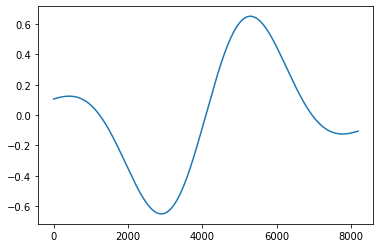

In [270]:
plt.plot(wabble(r=4.5,sigma=0.5))

rfft shape and timestream blocked shape (2048, 503) (2048, 1004)


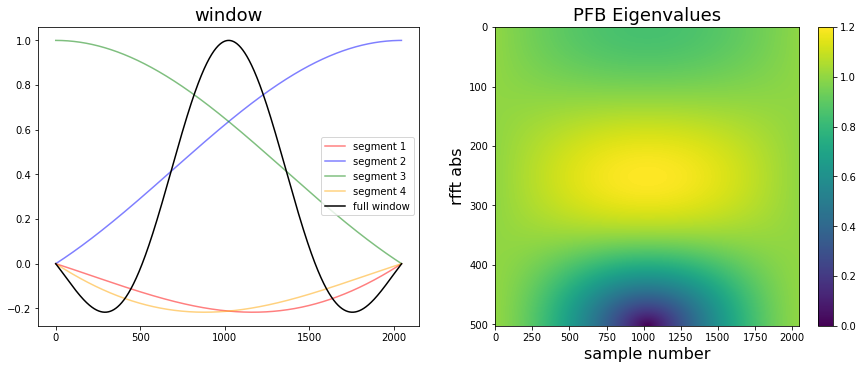

In [265]:
image_eigenvalues(sinc_window())

rfft shape and timestream blocked shape (2048, 503) (2048, 1004)


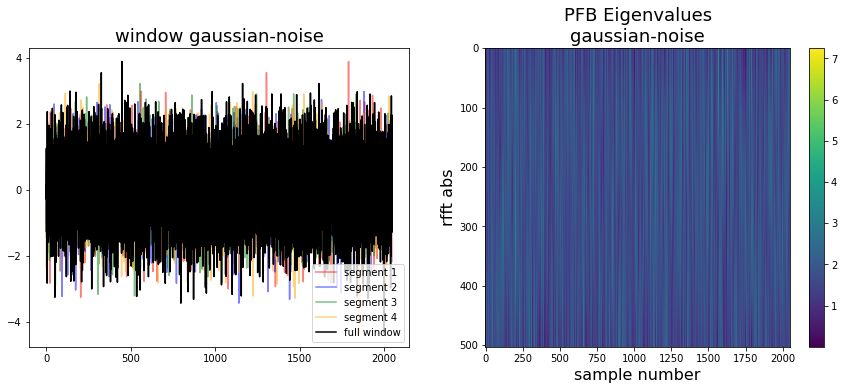

In [239]:
gaussian_noise = np.random.normal(size=4*2048)
image_eigenvalues(gaussian_noise,name="gaussian-noise")

In [ ]:
image_eigenvalues(np.random.gaussian())

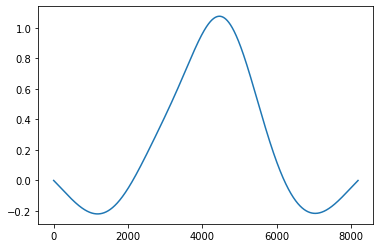

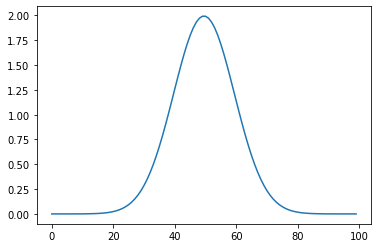

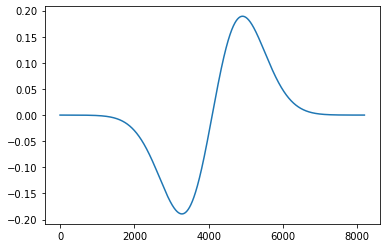

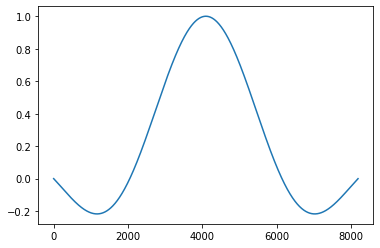

In [139]:
plt.plot(sinc_window()+wabble())
plt.show()
plt.plot(gaussian(np.linspace(-1,1,100),0,0.2))
plt.show()
plt.plot(wabble())
plt.show()
plt.plot(sinc_window())
plt.show()

In [124]:
padded = zero_padding(w2d)

In [75]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6,7],[7,8,9]])
np.concatenate([a,b],axis=1)

array([[1, 2, 5, 6, 7],
       [3, 4, 7, 8, 9]])

(2048, 503) (2048, 1004)


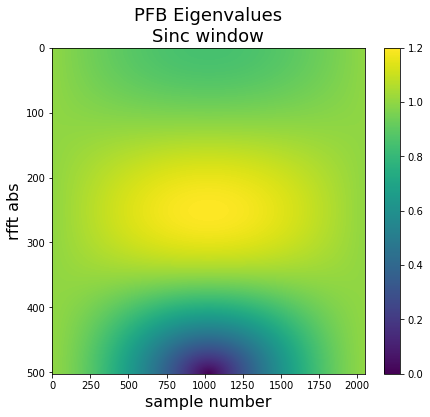

In [120]:
ntap,lblock = 4,2048
w = sinc_window(ntap,lblock)
w2d = chop_win(w,ntap,lblock)
w2d_padded = zero_padding(w2d)
ft = np.apply_along_axis(rfft,1,w2d_padded)
ft_abs = np.abs(ft)

print(ft.shape,w2d_padded.shape)
plt.figure(figsize=(7,6))
plt.imshow(ft_abs.T,aspect="auto")
plt.xlabel("sample number",fontsize=16)
plt.ylabel("rfft abs",fontsize=16)
plt.colorbar()
plt.title("PFB Eigenvalues\nSinc window",fontsize=18)
# plt.savefig("figures/pfb-eig-sinc.png")
plt.show()

In [67]:
w = sinc_window(ntap,lblock)
for i in sample_from_win(w,ntap,lblock):
    print(i)

[-3.89817183e-17  3.89817183e-17  1.00000000e+00  3.89817183e-17]
[-2.44200148e-04  4.88519593e-04  9.99999608e-01 -4.88042756e-04]
[-4.88519019e-04  9.77515573e-04  9.99998431e-01 -9.75608226e-04]
[-7.32956123e-04  1.46698749e-03  9.99996470e-01 -1.46269596e-03]
[-9.77510973e-04  1.95693488e-03  9.99993725e-01 -1.94930551e-03]
[-0.00122218  0.00244736  0.9999902  -0.00243544]
[-0.00146697  0.00293825  0.99998588 -0.00292109]
[-0.00171188  0.00342963  0.99998078 -0.00340626]
[-0.0019569   0.00392147  0.9999749  -0.00389095]
[-0.00220203  0.00441379  0.99996823 -0.00437516]
[-0.00244729  0.00490658  0.99996078 -0.0048589 ]
[-0.00269265  0.00539984  0.99995255 -0.00534215]
[-0.00293813  0.00589358  0.99994353 -0.00582491]
[-0.00318372  0.00638778  0.99993372 -0.0063072 ]
[-0.00342943  0.00688246  0.99992313 -0.006789  ]
[-0.00367525  0.00737761  0.99991176 -0.00727032]
[-0.00392117  0.00787323  0.9998996  -0.00775116]
[-0.00416722  0.00836931  0.99988666 -0.00823151]
[-0.00441337  0.0088

[-0.21675099  0.7464718   0.51697799 -0.19200226]
[-0.21672831  0.74702649  0.51631806 -0.19185676]
[-0.2167051   0.74758074  0.515658   -0.19171089]
[-0.21668136  0.74813456  0.51499782 -0.19156466]
[-0.21665709  0.74868794  0.51433751 -0.19141807]
[-0.2166323   0.74924089  0.51367709 -0.19127112]
[-0.21660698  0.7497934   0.51301654 -0.19112381]
[-0.21658114  0.75034548  0.51235587 -0.19097614]
[-0.21655476  0.75089712  0.51169508 -0.19082811]
[-0.21652786  0.75144832  0.51103417 -0.19067972]
[-0.21650043  0.75199908  0.51037314 -0.19053098]
[-0.21647247  0.7525494   0.509712   -0.19038188]
[-0.21644398  0.75309928  0.50905074 -0.19023242]
[-0.21641496  0.75364872  0.50838936 -0.1900826 ]
[-0.21638542  0.75419772  0.50772787 -0.18993243]
[-0.21635534  0.75474627  0.50706627 -0.18978191]
[-0.21632473  0.75529438  0.50640455 -0.18963103]
[-0.21629359  0.75584205  0.50574272 -0.18947979]
[-0.21626193  0.75638927  0.50508078 -0.18932821]
[-0.21622973  0.75693605  0.50441873 -0.18917627]


In [38]:
np.linspace(-1,1,5)

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [39]:
ntap,lblock = 4,2048
wa = sinc_alt(4,lblock)
w = sinc_window(4,lblock)

In [41]:
print(np.round(w,10) == np.round(wa,10))
print(w)
print(wa)

[ True  True  True ...  True  True  True]
[-3.89817183e-17 -2.44200148e-04 -4.88519019e-04 ... -7.32956123e-04
 -4.88519019e-04 -2.44200148e-04]
[-3.89817183e-17 -2.44200148e-04 -4.88519019e-04 ... -7.32956123e-04
 -4.88519019e-04 -2.44200148e-04]


In [64]:
a=np.array([1,23,4,4,5,5])
np.reshape(a,(2,3))

array([[ 1, 23,  4],
       [ 4,  5,  5]])

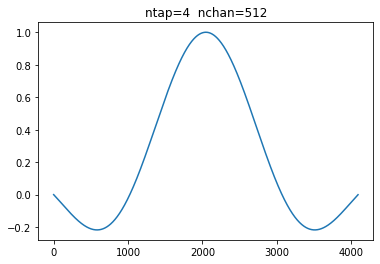

In [54]:
ntap,nchan=4,1024
plt.plot(sinc_window(ntap,2*nchan))
plt.title("ntap={}  nchan={}".format(ntap,nchan))
plt.savefig("sinc_window_ntap={}_nchan={}".format(ntap,nchan))
plt.show()